In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [45]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv('Social_Network_Ads.csv')

In [47]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df = df.iloc[:, 2:]

In [49]:
df.sample(10)

,Age,EstimatedSalary,Purchased
212,59,42000,0
304,40,60000,0
217,40,78000,0
106,26,35000,0
346,53,72000,1
258,58,95000,1
306,51,134000,0
40,27,17000,0
351,37,75000,0
82,20,49000,0


Train test split 

In [50]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [53]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Age','EstimatedSalary'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Age','EstimatedSalary'])

In [54]:
X_train = pd.DataFrame(X_train, columns=['Age', 'EstimatedSalary'])
X_test = pd .DataFrame(X_test, columns=['Age', 'EstimatedSalary'])

In [55]:
type(X_train)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'After Standardization')

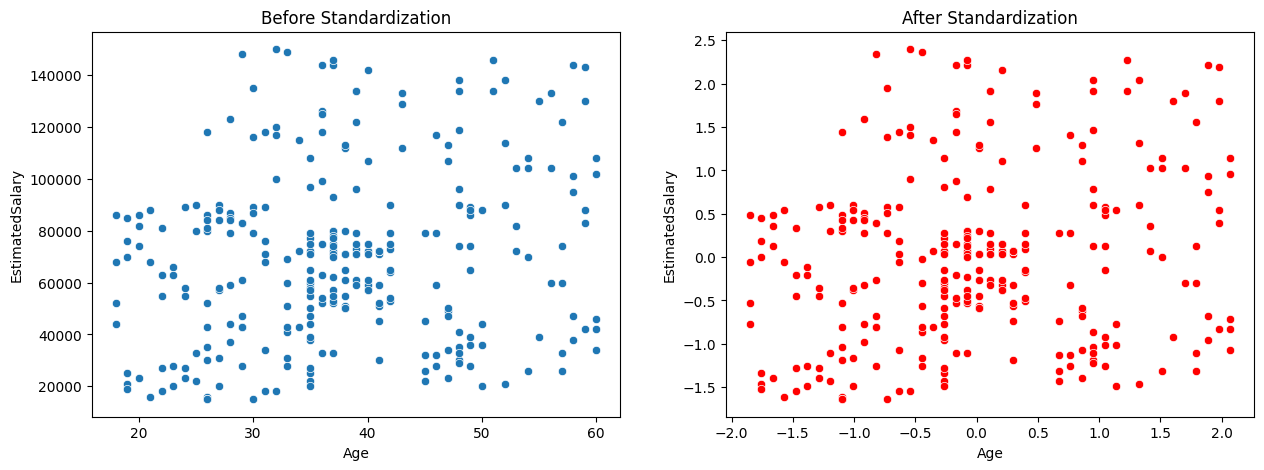

In [56]:
# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Define axs here

# Plot before standardization
sns.scatterplot(x=X_train['Age'], y=X_train['EstimatedSalary'], ax=axs[0])
axs[0].set_title('Before Standardization')

# Plot after standardization
sns.scatterplot(x=X_train_scaled['Age'], y=X_train_scaled['EstimatedSalary'], ax=axs[1], color = 'red')
axs[1].set_title('After Standardization')


Text(0.5, 1.0, 'After Standardization')

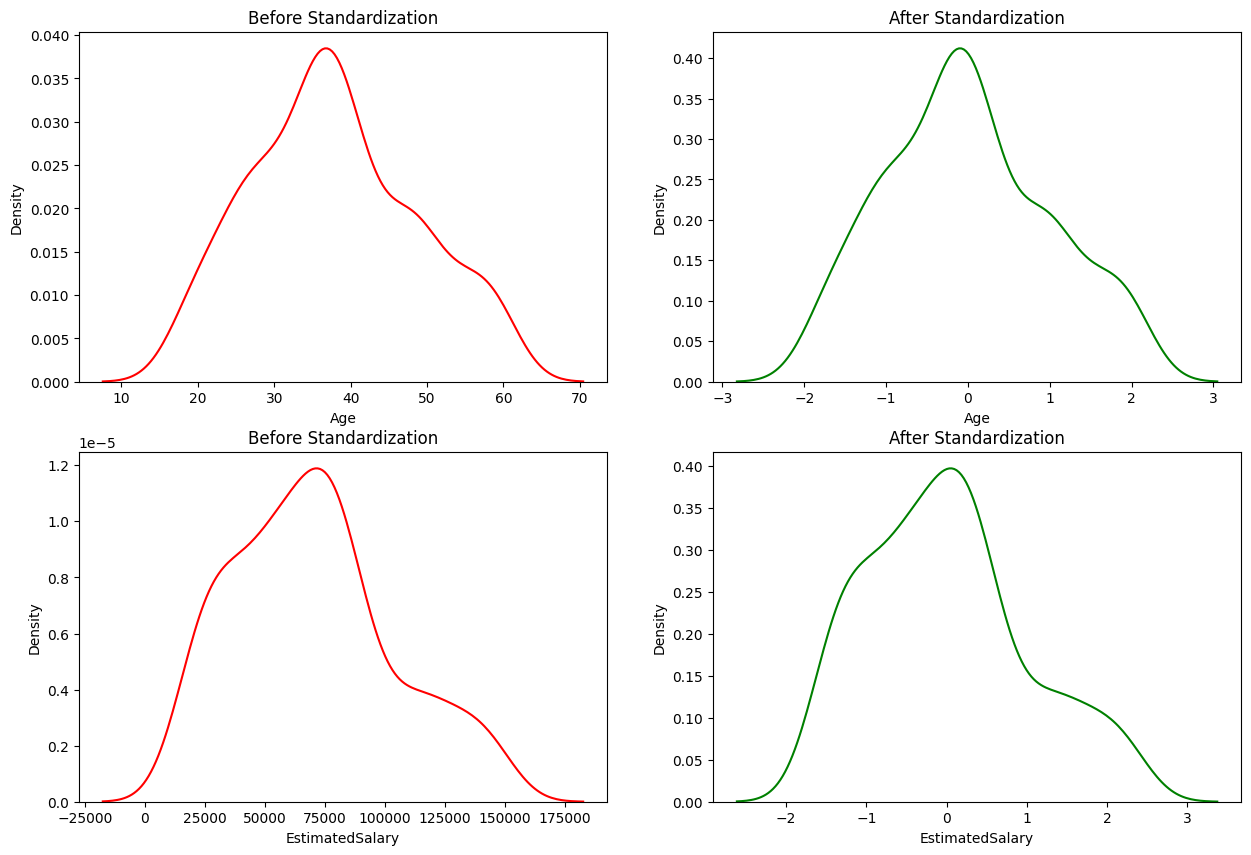

In [57]:
# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Define axs here

sns.distplot(X_train['Age'], ax=axs[0,0], color='red', hist=False)
axs[0,0].set_title('Before Standardization')

sns.distplot(X_train_scaled['Age'], ax=axs[0,1], color='green', hist=False)
axs[0,1].set_title('After Standardization')

sns.distplot(X_train['EstimatedSalary'], ax=axs[1,0], color='red', hist=False)
axs[1,0].set_title('Before Standardization')

sns.distplot(X_train_scaled['EstimatedSalary'], ax=axs[1,1], color='green', hist=False)
axs[1,1].set_title('After Standardization')


Text(0.5, 1.0, 'After Standardization')

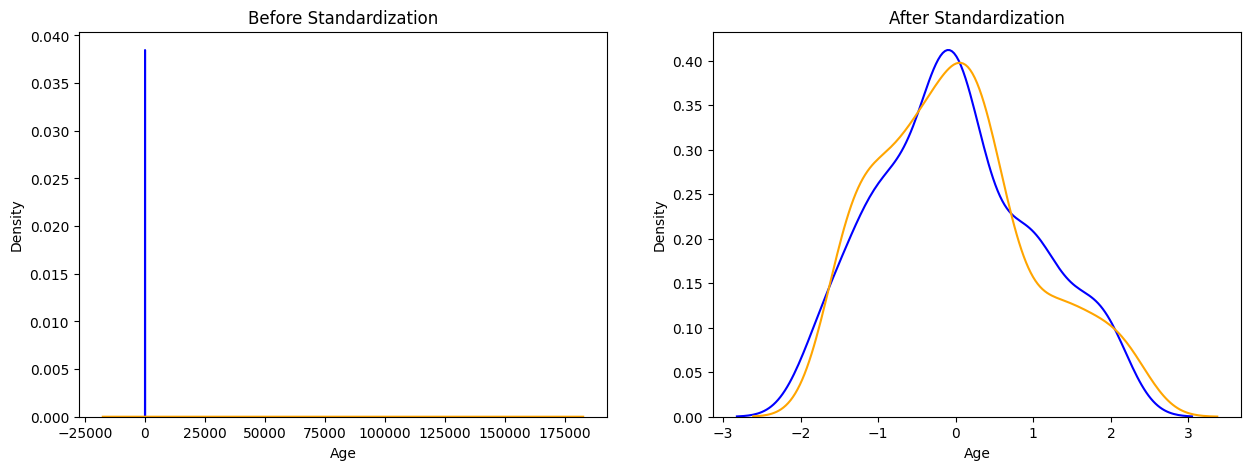

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(X_train['Age'], ax=axs[0], color='blue')
sns.kdeplot(X_train['EstimatedSalary'], ax=axs[0], color='orange')
axs[0].set_title('Before Standardization')

sns.kdeplot(X_train_scaled['Age'], ax=axs[1], color='blue')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=axs[1], color='orange')
axs[1].set_title('After Standardization')

Why Scaling is important 

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [62]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [64]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score
print('Actual accuracy score', accuracy_score(y_test, y_pred))
print('Scaled Accuracy score', accuracy_score(y_test, y_pred_scaled))

Actual accuracy score 0.65
Scaled Accuracy score 0.8333333333333334
